# Demand Forecasting with ARIMA model

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize']= 10,6

In [3]:
PATH='......../Desktop/Forecasting/demand_forecasting_kernels_only'

df=pd.read_csv('......../demand_forecasting_kernels_only/train.csv')

In [4]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
date     913000 non-null object
store    913000 non-null int64
item     913000 non-null int64
sales    913000 non-null int64
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [6]:
# df_data=df[['date','sales']]

In [7]:
# sales_a = df[df.store == 1]['sales'].sort_index(ascending = True)

In [8]:
# sa.reset_index(inplace=True)

# sa.rename(columns={'date':'ds','sales':'y'},inplace=True)

In [9]:
# df_data.head()

In [10]:
sales_a = df[df.store == 1][['date','sales']]

In [11]:
sales_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91300 entries, 0 to 896565
Data columns (total 2 columns):
date     91300 non-null object
sales    91300 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [12]:
sales_b=sales_a.copy()

In [13]:
sales_b['date']=pd.to_datetime(sales_b['date'], infer_datetime_format=True)

In [14]:
sales_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91300 entries, 0 to 896565
Data columns (total 2 columns):
date     91300 non-null datetime64[ns]
sales    91300 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 MB


In [15]:
sales_b.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [16]:
sales_AR=sales_b.set_index(['date'])

In [17]:
sales_AR.head(5)

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10


/Users/gurunathmane/anaconda3/envs/TensorFlow/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


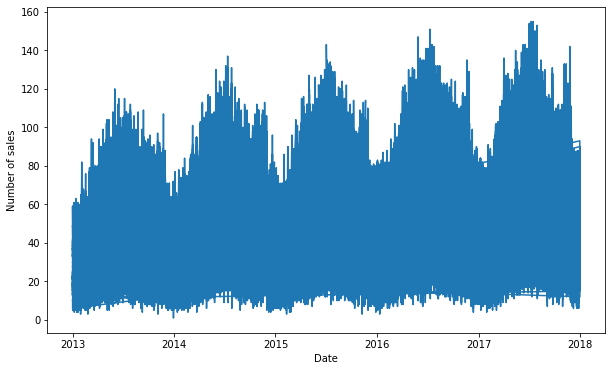

In [18]:
# plot graph 
plt.xlabel('Date')
plt.ylabel('Number of sales')
plt.plot(sales_AR)

In [19]:
ds=sales_AR.resample('W').sum().sort_index(ascending=True)

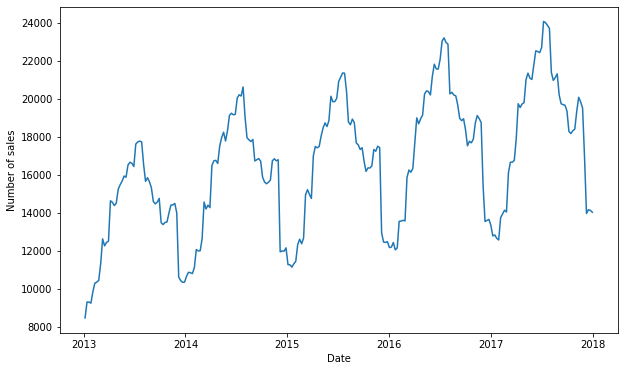

In [20]:
# plot graph 
plt.xlabel('Date')
plt.ylabel('Number of sales')
plt.plot(ds)

# Determining Rolling Statistics

In [21]:
rolmean=ds.rolling(window=12).mean()
rolstd=ds.rolling(window=12).std()
print(rolmean,rolstd)

                   sales
date                    
2013-01-06           NaN
2013-01-13           NaN
2013-01-20           NaN
2013-01-27           NaN
2013-02-03           NaN
...                  ...
2017-12-03  18954.250000
2017-12-10  18476.583333
2017-12-17  18018.416667
2017-12-24  17582.833333
2017-12-31  17228.166667

[261 rows x 1 columns]                   sales
date                   
2013-01-06          NaN
2013-01-13          NaN
2013-01-20          NaN
2013-01-27          NaN
2013-02-03          NaN
...                 ...
2017-12-03   932.870558
2017-12-10  1688.439272
2017-12-17  2049.350250
2017-12-24  2284.665276
2017-12-31  2489.305300

[261 rows x 1 columns]


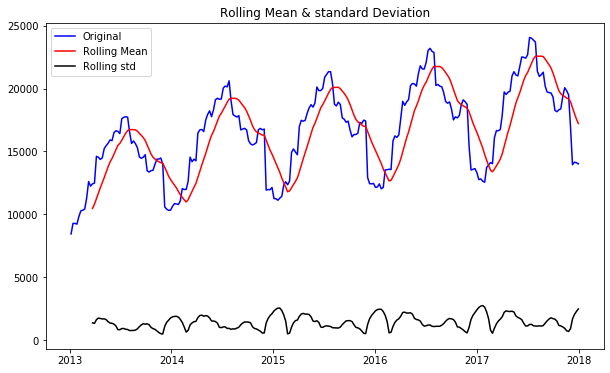

In [22]:
# plot rolling statistic
orig=plt.plot(ds, color='blue',label='Original')
mean=plt.plot(rolmean, color='red',label='Rolling Mean')
std=plt.plot(rolstd, color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & standard Deviation')
plt.show(block=False)

In [23]:
# Perform Dicky-Fuller test
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-Fuller Test:")
dftest=adfuller(ds['sales'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.341578
p-value                          0.013119
#Lags Used                       4.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


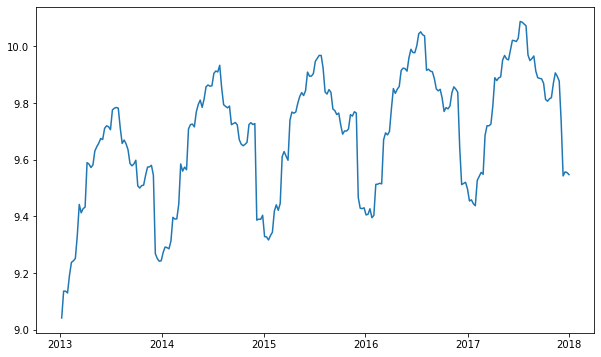

In [24]:
ds_logScale= np.log(ds)
plt.plot(ds_logScale)

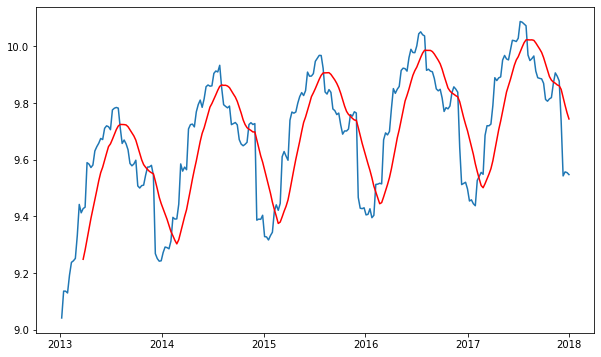

In [25]:
movingAverage=ds_logScale.rolling(window=12).mean()
movingStd=ds_logScale.rolling(window=12).std()
plt.plot(ds_logScale)
plt.plot(movingAverage,color='red')

In [26]:
dataLogScaleMA=ds_logScale-movingAverage
dataLogScaleMA.head(12)

,sales
date,
2013-01-06,NaN
2013-01-13,NaN
2013-01-20,NaN
2013-01-27,NaN
2013-02-03,NaN
2013-02-10,NaN
2013-02-17,NaN
2013-02-24,NaN
2013-03-03,NaN


In [27]:
# Removing Nan Values
dataLogScaleMA.dropna(inplace=True)
dataLogScaleMA.head()

,sales
date,
2013-03-24,0.178825
2013-03-31,0.151295
2013-04-07,0.270675
2013-04-14,0.228093
2013-04-21,0.179168


In [28]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determining rolling statistics 
    movingAverage=timeseries.rolling(window=12).mean()
    movingStd=timeseries.rolling(window=12).std()
    
    #Plot rolling Statistics:
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(movingAverage, color='red',label='Rolling Mean')
    std= plt.plot(movingStd,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest=adfuller(timeseries['sales'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    
    print(dfoutput)

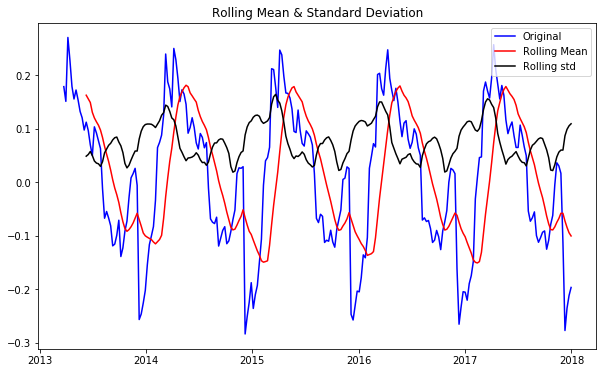

Results of Dickey-Fuller Test:
Test Statistic                  -4.246371
p-value                          0.000549
#Lags Used                       4.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64


In [29]:
test_stationary(dataLogScaleMA)

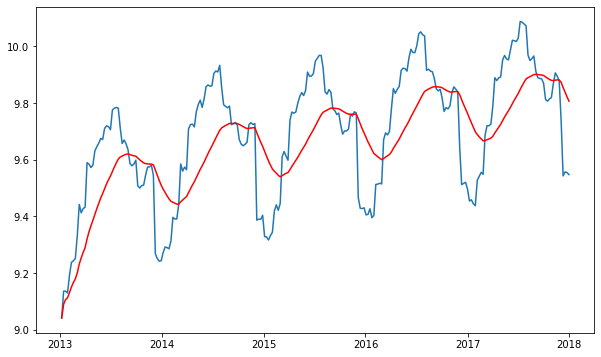

In [30]:
exponentialDecayWeightedAverage=ds_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(ds_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

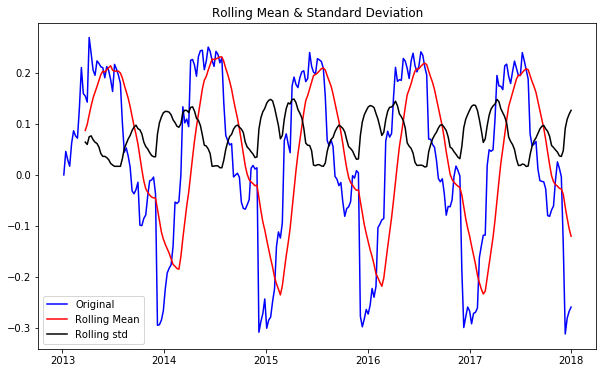

Results of Dickey-Fuller Test:
Test Statistic                  -3.404485
p-value                          0.010807
#Lags Used                       4.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


In [31]:
dslsmmeda=ds_logScale-exponentialDecayWeightedAverage
test_stationary(dslsmmeda)

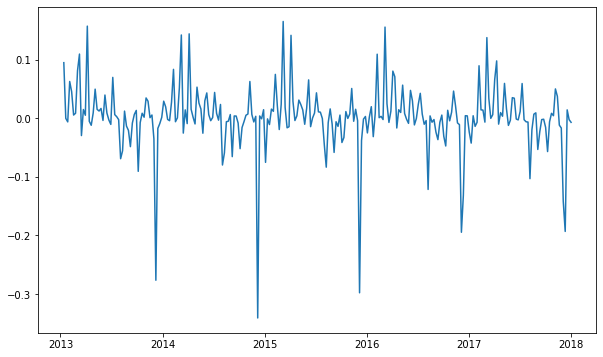

In [32]:
datasetLogDiffShifting=ds_logScale-ds_logScale.shift()
plt.plot(datasetLogDiffShifting)

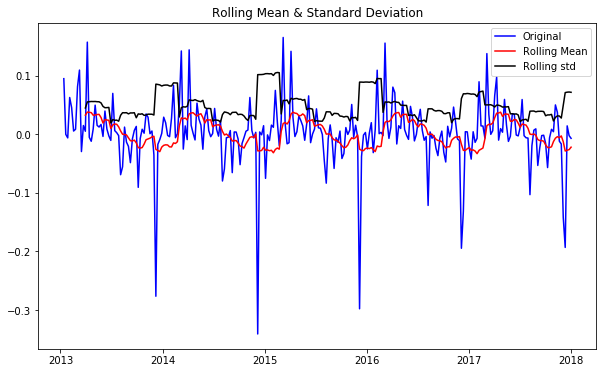

Results of Dickey-Fuller Test:
Test Statistic                -6.013957e+00
p-value                        1.549591e-07
#Lags Used                     3.000000e+00
Number of Observations Used    2.560000e+02
Critical Value (1%)           -3.456155e+00
Critical Value (5%)           -2.872897e+00
Critical Value (10%)          -2.572822e+00
dtype: float64


In [33]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

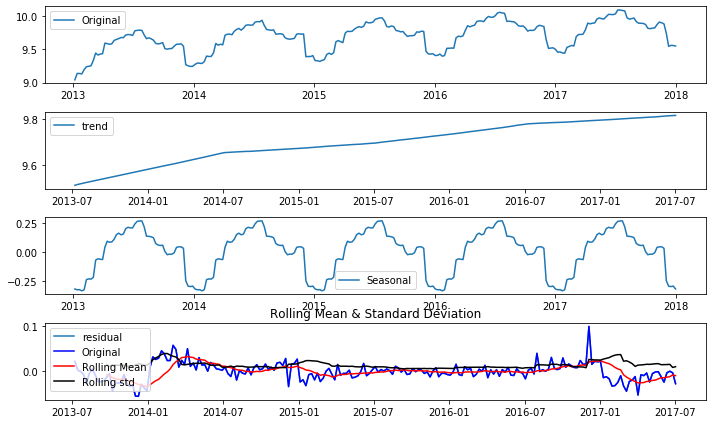

Results of Dickey-Fuller Test:
Test Statistic                  -3.536924
p-value                          0.007088
#Lags Used                       5.000000
Number of Observations Used    203.000000
Critical Value (1%)             -3.462980
Critical Value (5%)             -2.875885
Critical Value (10%)            -2.574416
dtype: float64


In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(ds_logScale)
trend=decomposition.trend
seasonal =decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(ds_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')

plt.tight_layout()

decompositionLogData=residual
decompositionLogData.dropna(inplace=True)
test_stationary(decompositionLogData)

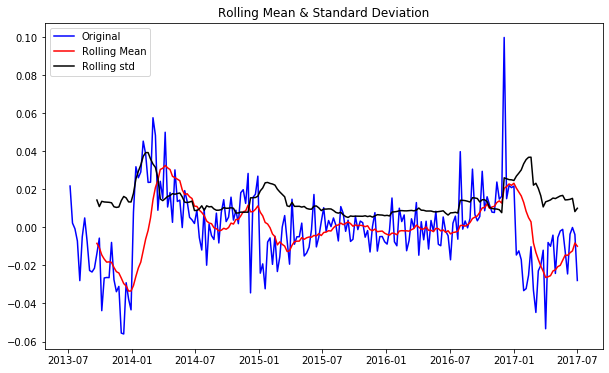

Results of Dickey-Fuller Test:
Test Statistic                  -3.536924
p-value                          0.007088
#Lags Used                       5.000000
Number of Observations Used    203.000000
Critical Value (1%)             -3.462980
Critical Value (5%)             -2.875885
Critical Value (10%)            -2.574416
dtype: float64


In [35]:
decompositionLogData=residual
decompositionLogData.dropna(inplace=True)
test_stationary(decompositionLogData)

/Users/gurunathmane/anaconda3/envs/TensorFlow/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


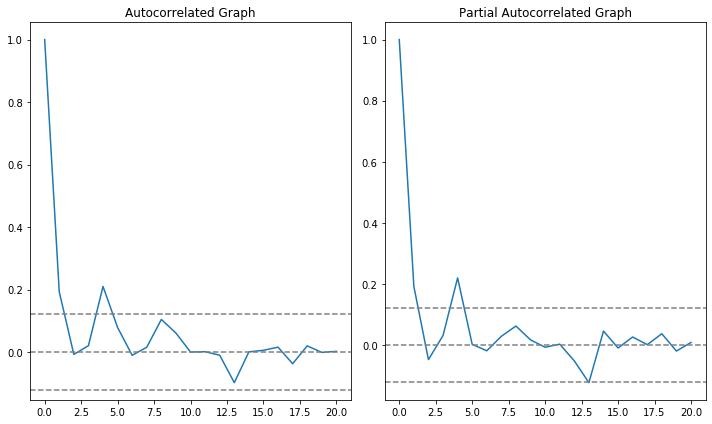

In [36]:
# To know the value of P and Q
# we need to calculate ACF and PACF plots:

from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(datasetLogDiffShifting,nlags=20)
lag_pacf=pacf(datasetLogDiffShifting,nlags=20,method='ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelated Graph')

#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelated Graph')
plt.tight_layout()



Plotting AR Model


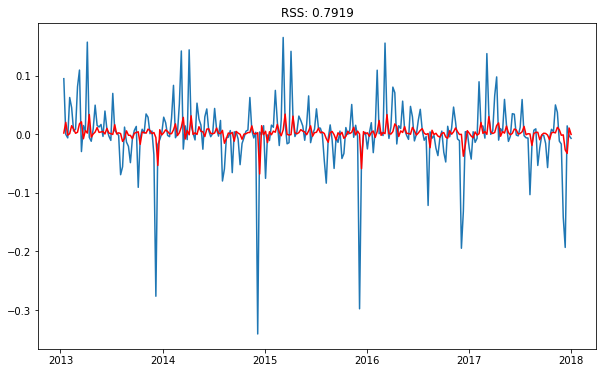

In [37]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model=ARIMA(ds_logScale,order=(0,1,2))
result_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_AR.fittedvalues-datasetLogDiffShifting['sales'])**2))
print('Plotting AR Model')

Plotting AR Model


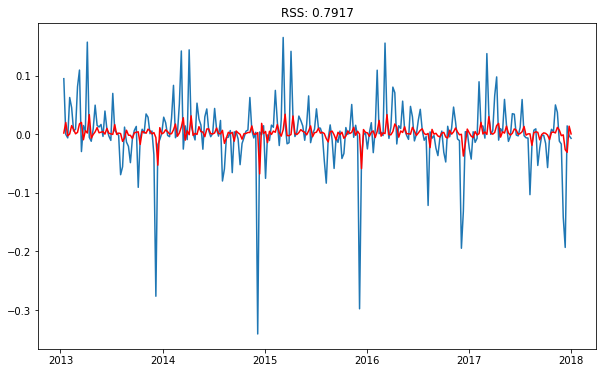

In [38]:
#MA model
model=ARIMA(ds_logScale,order=(2,1,0))
result_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_AR.fittedvalues-datasetLogDiffShifting['sales'])**2))
print('Plotting AR Model')

Text(0.5, 1.0, 'RSS: 0.7917')

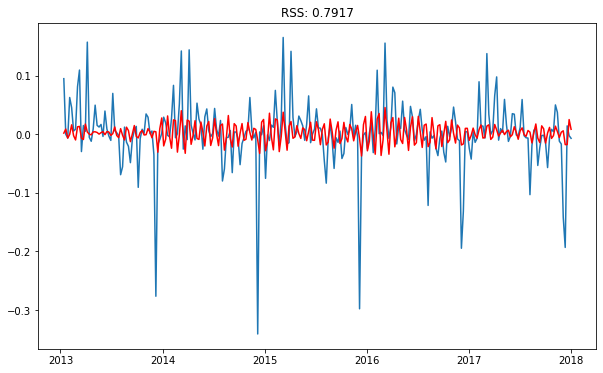

In [39]:
#MA model
model=ARIMA(ds_logScale,order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_AR.fittedvalues-datasetLogDiffShifting['sales'])**2))

In [40]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff)

date
2013-01-13    0.001860
2013-01-20    0.008741
2013-01-27   -0.006710
2013-02-03   -0.000304
2013-02-10    0.016015
                ...   
2017-12-03    0.005856
2017-12-10   -0.017737
2017-12-17   -0.017700
2017-12-24    0.024978
2017-12-31    0.008369
Freq: W-SUN, Length: 260, dtype: float64


In [41]:
# Conver to cumulative sum
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())


date
2013-01-13    0.001860
2013-01-20    0.010600
2013-01-27    0.003890
2013-02-03    0.003586
2013-02-10    0.019601
Freq: W-SUN, dtype: float64


In [42]:
predictions_ARIMA_log=pd.Series(ds_logScale['sales'].iloc[0],index=ds_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2013-01-06    9.041803
2013-01-13    9.043663
2013-01-20    9.052404
2013-01-27    9.045693
2013-02-03    9.045389
Freq: W-SUN, dtype: float64

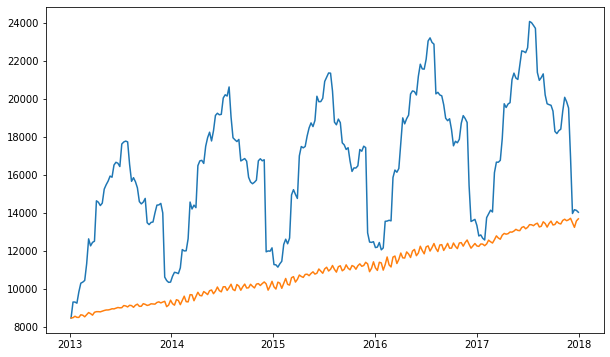

In [43]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(ds)
plt.plot(predictions_ARIMA)

In [44]:
ds_logScale

,sales
date,
2013-01-06,9.041803
2013-01-13,9.136586
2013-01-20,9.136371
2013-01-27,9.130106
2013-02-03,9.192787
...,...
2017-12-03,9.736370
2017-12-10,9.543163
2017-12-17,9.557399


In [45]:
#results_ARIMA.plot_predict(1,304)
# results_ARIMA.plot_predict(1,364)


In [46]:
results_ARIMA.forecast(steps=120)

(array([9.52208774, 9.52967355, 9.55507355, 9.54081942, 9.52775015,
        9.55162848, 9.55759189, 9.53677104, 9.54506069, 9.56543786,
        9.55280155, 9.54374511, 9.56427001, 9.5679643 , 9.55134499,
        9.55986986, 9.57616827, 9.56516363, 9.55922127, 9.57678817,
        9.57888322, 9.56578714, 9.57422231, 9.58723088, 9.57780646,
        9.57425578, 9.58924169, 9.59024903, 9.58008726, 9.58821686,
        9.59859044, 9.59065265, 9.58891713, 9.6016726 , 9.60197787,
        9.59424374, 9.60193352, 9.61021211, 9.60364238, 9.60326546,
        9.61411009, 9.61399963, 9.60826085, 9.61543662, 9.6220626 ,
        9.61672998, 9.61735299, 9.62657362, 9.6262561 , 9.62214665,
        9.62877754, 9.63411094, 9.62988097, 9.63122466, 9.63907534,
        9.63869926, 9.63591149, 9.64199695, 9.64632886, 9.64306974,
        9.64491887, 9.65162202, 9.65128976, 9.64956685, 9.65512686,
        9.65869097, 9.65627758, 9.65846809, 9.66421657, 9.66399554,
        9.66312456, 9.66819216, 9.67117475, 9.66